<a href="https://colab.research.google.com/github/Vivekchavda1374/AI/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv("/content/airplane_passenger_prediction.csv")

In [44]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [45]:
df["Month"]=pd.to_datetime(df["Month"])
df.set_index("Month",inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [46]:
scaler  = MinMaxScaler(feature_range=(0,1))

In [47]:
data_scaled = scaler.fit_transform(df)

In [48]:
def create_sequence(data,seq_length):
  x = []
  y = []
  for i in range(len(data)-seq_length):
    x.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(x),np.array(y)

In [49]:
seq_length=5
x,y = create_sequence(data_scaled,seq_length)


In [50]:
x

array([[[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208]],

       [[0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208]],

       [[0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606]],

       [[0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753]],

       [[0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ]],

       [[0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123

In [51]:
y

array([[0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374517],
       [0.17760618],
       [0.17760618],
       [0.25482625],
       [0.25289575],
       [0.241

In [52]:
#splite data into train test

size = int(0.8*int(len(x)))
x_train = x[:size]
y_train = y[:size]
x_test = x[size:]
y_test = y[size:]

In [53]:
#define lstm model

model= Sequential([LSTM(50,return_sequences=True, input_shape=(seq_length,1)),
                   LSTM(50),Dense(1)])


In [54]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,y_train,epochs=100,batch_size=32, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0979
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0577
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0181
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0161
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0187 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0130
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0127
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0100
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0098
Epoch 16/100
4/4 ━

In [55]:
predictions = model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


In [55]:
y_test = scaler.inverse_transform(y_test)

In [56]:
predictions = scaler.inverse_transform(predictions)


In [57]:
predictions

array([[449.96198],
       [407.57596],
       [347.76337],
       [301.0866 ],
       [299.63644],
       [325.60635],
       [334.63513],
       [361.98755],
       [372.16055],
       [384.33987],
       [411.3301 ],
       [451.633  ],
       [479.05817],
       [433.48547],
       [370.51883],
       [321.95868],
       [332.44284],
       [364.55002],
       [371.66977],
       [380.7259 ],
       [396.8431 ],
       [415.21304],
       [449.67404],
       [495.60666],
       [501.55963],
       [445.6887 ],
       [383.00262],
       [329.04443]], dtype=float32)

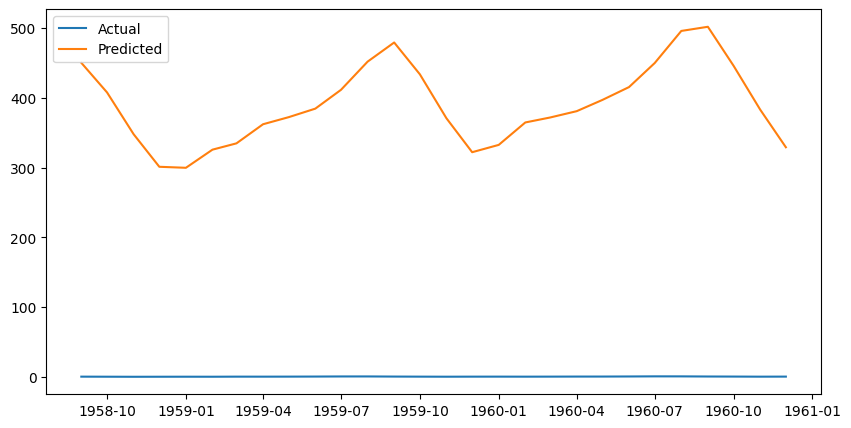

In [62]:
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):],y_test,label="Actual")
plt.plot(df.index[-len(y_test):],predictions,label="Predicted")
plt.legend()
plt.show()